Value will be predicted for student who slept 5 hours and studied 9 hours
Predict value is 1. So this student will pass!!


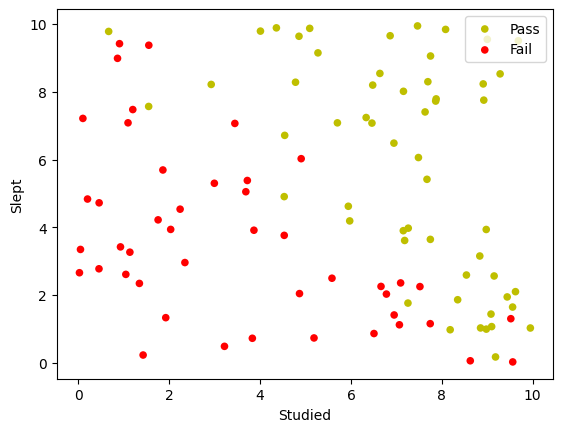

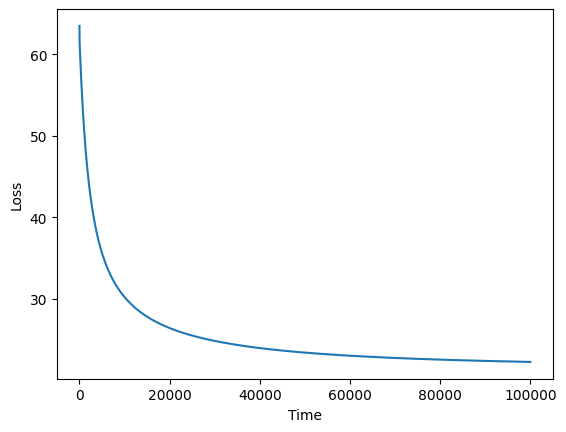

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Hàm sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# Load data từ file csv
data = pd.read_csv('data_classification.csv',header=None).values
N, d = data.shape
x = data[:, 0:d - 1].reshape(-1, d - 1)
y = data[:, 2].reshape(-1, 1)
true_x=[]
true_y=[]
false_x=[]
false_y=[]
for i in data :
    if i[2] == 1 :
        true_x.append(i[0])
        true_y.append(i[1])
    else :
        false_x.append(i[0])
        false_y.append(i[1])
def predict(features,weights):
    """
    :param features: mảng các đặc tính (100 * 3 ) slept studied và 1
    :param weights: gồm ma trận (1*3) w0 w1 w2
    khi nhân vô hướng sẽ ra được hàm z  = slept*w1 + studied*w2 +1 *1
    :return: xác suất của hàm z
    """
    z = np.dot(features,weights)
    return sigmoid(z)
def loss_function(features,labels,weights):
    """
    :param features: mảng các đặc tính (100 * 3 ) slept studied và 1
    :param labels:
    :param weights: gồm ma trận (1*3) w0 w1 w2
    :return:
    """
    n = len(labels)
    prediction = predict(features,weights)
    """
    prediction
    example : [0.6,0.7,0.5,0.4]
    """
    loss_class1 = -labels*np.log(prediction)
    loss_class2 = -(1-labels)*np.log(1-prediction)
    loss = loss_class1+loss_class2
    return np.sum(loss)
def decisionBoundary(p) :
    if p >= 0.5 : return 1
    else: return 0
def update_weight (features,labels,weights,learning_rate) :
    """

    """
    n=len(labels)
    prediction = predict(features,weights)
    weights_temp = np.dot(features.T,(prediction-labels))/n
    updated_weight = weights-weights_temp*learning_rate
    return updated_weight
def train (features, labels, weights, learning_rate, iter) :
    history_loss=[]
    for i in range (iter):
        weights = update_weight(features,labels,weights,learning_rate)
        loss = loss_function(features,labels,weights)
        history_loss.append(loss)
        #print("Loss in {} is : {}".format(i, history_loss[i]))
    return weights,history_loss
# Thêm cột 1 vào dữ liệu x
x = np.hstack((np.ones((N, 1)), x))
w = np.array([0., 0.1, 0.1]).reshape(-1, 1)
# Số lần lặp bước 2
numOfIteration = 100000
cost = np.zeros((numOfIteration, 1))
learning_rate = 0.01
w,loss = train(x,y,w,learning_rate,numOfIteration)
x_test = [1,5,9]
temp= predict(x_test,w)
print("Value will be predicted for student who slept {} hours and studied {} hours".format(x_test[1],x_test[2]))
if (decisionBoundary(temp)==1) :
    print("Predict value is {}. So this student will pass!!".format(decisionBoundary(temp)))
else: print("Predict value is {}. So this student will fail!!".format(decisionBoundary(temp)))
plt.scatter(true_x,true_y,marker="o",c="y",edgecolors='none', s=30, label='Pass')
plt.scatter(false_x,false_y,marker="o",c="r",edgecolors='none', s=30, label='Fail')
plt.legend(loc=1)
plt.xlabel('Studied')
plt.ylabel('Slept')
plt.show()
yTime_series = np.array([i for i in range(numOfIteration)])
plt.plot(yTime_series,loss)
plt.xlabel("Time")
plt.ylabel("Loss")
plt.show()